# Project by: The Sparks Foundation

( Graduate Rotational Internship Program )

# Task 1: Prediction using Supervised Machine Learning

* Mentor : The Sparks Foundation

* Name: Naim A. Sattar Kalekhan

# Problem Statement : 
    
1. Predict the percentage of an student based on the no. of study hours.
2. What will be predicted score if a student studies for 9.25 hrs/ day? 


# Solution:

1. To predict the percentage of student based on the no.of study hours :

# Import the Libraries

* We imported the required libraries which we are going to use further.
* We are importing, 
  1. Pandas for - Data Importing, Data Analysis, etc
  2. Numpy for - Used for working with arrays and linear algebra
  3. Matplotli and seaborn for - Data Visualization 

In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Reading 

* Read the given data set using pandas.
* As given file is in the csv format, we are using 'pd.read_csv' funtion to read the given data set.

In [62]:
stu_sco= pd.read_csv(r"C:\Users\Fahim\Desktop\Sparks FOundation\Task 1\student_scores - student_scores.csv")

# 

* Action: Read the imported data by using " head() "

In [63]:
stu_sco.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


* Conclusion: There are 2 columns and both are in numeric form.

Action: Check the shape of the given data set.

In [64]:
stu_sco.shape

(25, 2)

* Conclusion: There are 25 records and 2 columns.

# 

* Action: Check for the nulls if any present in the given data set using " is.null().sum() " 

In [65]:
stu_sco.isnull().sum()

Hours     0
Scores    0
dtype: int64

* Conclusion: As we can see there is no any null values present, we can move further.

# 

* Action: Describe the data using " describe() "

In [66]:
stu_sco.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


* Conclusion: As we can see that, all the given data set is well described by using different terms. 

# 

* Action: Check the data type of the gievn data set. 

In [67]:
stu_sco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


* Conclusion: As we can see, from the above step, "Hours" is in the form of "float64" data-type and "Scores" is in the form "int64" data type. 

# 

# Exploratory Data Analysis

Let's have some EDA for the better understanding of the given data set- "visually".

* Action: 
         We are labelled x-axis as "Hours" and y-axis as "%-Scores Achieved". Whereas, the formed table is titeled as "Hours vs %-Scores Achieved" and the points are noted by "dot".And the whole graph is fitted in (15, 15) graph.

<Figure size 1080x1080 with 0 Axes>

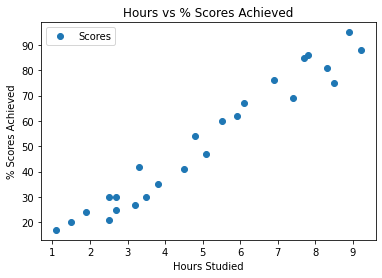

In [68]:
plt.figure(figsize=(15,15))
stu_sco.plot(x="Hours", y="Scores", style='o')
plt.title("Hours vs % Scores Achieved")
plt.xlabel("Hours Studied")
plt.ylabel("% Scores Achieved")
plt.show()

* Conclusion: 
           As we can see that, all the points are plotted linearly positive in which "%-Scores Achieved" is increasing as "Hours" of study is increasing, i.e. both the function are directly proportion to each other.

#  

* Action: Check the outliers.

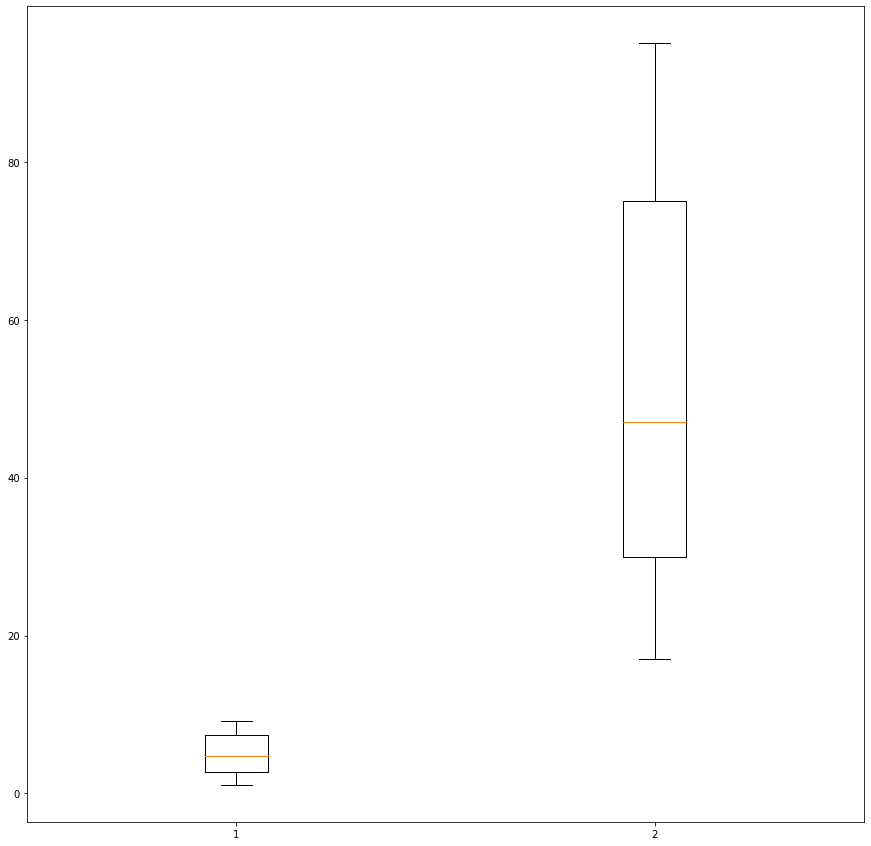

In [69]:
plt.figure(figsize=(15,15))
plt.boxplot(stu_sco)
plt.show()

Conclusion: As we can see that, there is no any outlier present in the given data set. So that, our data may not be affected.

#

# Sampling:

Let's split our given data set, into train and test data set in 80/20 ratio, where 'Hours' will be our 'Independant' variable and 'Scores' will be our 'Dependant' variable.

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
stu_sco_train, stu_sco_test= train_test_split(stu_sco, test_size=0.2, random_state=123)

In [72]:
stu_sco_train_x= stu_sco_train.iloc[: , :-1]
stu_sco_train_y= stu_sco_train.iloc[: , 1]

In [73]:
stu_sco_test_x = stu_sco_test.iloc[: , :-1]
stu_sco_test_y = stu_sco_test.iloc[: , 1]

In [74]:
print("Shape of stu_sco_train_x", stu_sco_train_x.shape)
print("Shape of stu_sco_train_y", stu_sco_train_y.shape)
print("Shape of stu_sco_test_x", stu_sco_test_x.shape)
print("Shape of stu_sco_test_y", stu_sco_test_y.shape)

Shape of stu_sco_train_x (20, 1)
Shape of stu_sco_train_y (20,)
Shape of stu_sco_test_x (5, 1)
Shape of stu_sco_test_y (5,)


# Model Building 

As the given problem is of Linear Regression, we are going to perform Linear Regression model, which is imported from 'sklearn.preprocessing' library.

In [75]:
from sklearn.linear_model import LinearRegression
stu_sco_model = LinearRegression()

In [76]:
stu_sco_model.fit(stu_sco_train_x, stu_sco_train_y)

LinearRegression()

# Predict the Values:

In [77]:
pred_values = stu_sco_model.predict(stu_sco_test_x)
pred_values

array([17.09796709, 48.78363906, 39.18192028, 61.26587347, 88.15068605])

# Create a Data Frame of Predicted And Actual Values

In [78]:
stu_sco.df = pd.DataFrame({'Actual':stu_sco_test_y, 'Predicted':pred_values})
stu_sco.df

<ipython-input-78-2ccc6cda1af6>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  stu_sco.df = pd.DataFrame({'Actual':stu_sco_test_y, 'Predicted':pred_values})


,Actual,Predicted
5,20,17.097967
21,54,48.783639
22,35,39.181920
18,67,61.265873
15,95,88.150686


*

Conclusion: As we can see that, predicted values and actual values are nealy equal over 'test prediction'.

# Run your model over train data.

In [79]:
pred_train = stu_sco_model.predict(stu_sco_train_x)
pred_train

array([82.38965478, 55.5048422 , 59.34552971, 36.30140465, 84.30999854,
       77.58879539, 45.90312342, 26.69968587, 28.62002962, 13.25727958,
       28.62002962, 26.69968587, 51.66415469, 76.62862351, 73.74810788,
       20.9386546 , 91.03120168, 68.94724849, 33.42088901, 34.38106089])

# Compare the predicetd train values with actual train values by creating one data frame.

In [80]:
stu_sco_df2 = pd.DataFrame({"Actual":stu_sco_train_y, "Predicted":pred_train})
stu_sco_df2

,Actual,Predicted
8,81,82.389655
7,60,55.504842
11,62,59.345530
4,30,36.301405
3,75,84.309999
24,86,77.588795
12,41,45.903123
16,30,26.699686
9,25,28.620030
14,17,13.257280


* Conclusion: As we can see that, predicted values and actual values are nealy equal over 'train prediction'.

# Solution-1-Completed

* 2. What will be predicted score if a student studies for 9.25 hrs/ day?

# To Predict the Percentage for the given Hours

In [81]:
print("Alpha_Value = ", stu_sco_model.intercept_)

Alpha_Value =  2.6953889223457423


In [82]:
print("Beta_Value = ", stu_sco_model.coef_)

Beta_Value =  [9.60171878]


* Let's predict the scores by using formula 

In [83]:
Predicted_Score= stu_sco_model.intercept_+stu_sco_model.coef_* 9.25
print("Predicted_Score = " , Predicted_Score)

Predicted_Score =  [91.51128762]


* Another method, to predict the scores

In [84]:
print("Predicted Score for the",stu_sco_model.predict([[9.25]]))

Predicted Score for the [91.51128762]


* Conclusion: Hence, if student will study for 9.25Hrs, then he/she will get 91.51%.

# Solution-2-Completed

# To draw the regression Line:

* To draw the regression line to get the best fit-line.

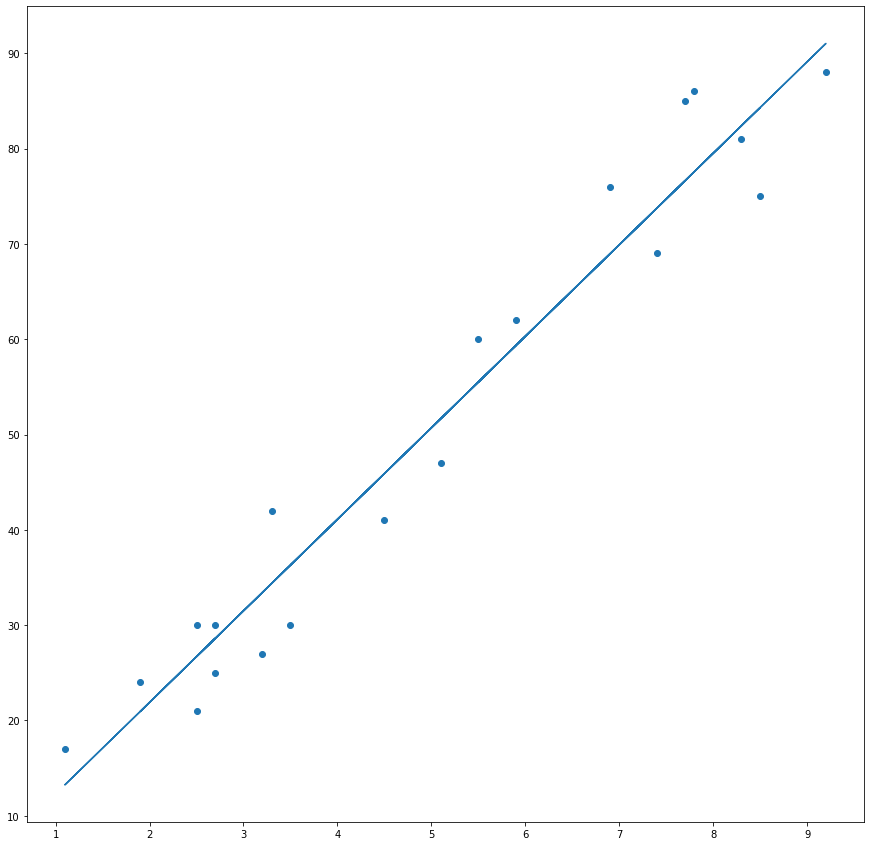

In [85]:
plt.figure(figsize=(15,15))
line = stu_sco_model.coef_*stu_sco_train_x + stu_sco_model.intercept_
plt.scatter(stu_sco_train_x, stu_sco_train_y)
plt.plot(stu_sco_train_x, line)
plt.show()

# To check the accuracy and error of the given model over train data

In [86]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
R_square = stu_sco_model.score(stu_sco_train_x, stu_sco_train_y)*100

In [87]:
print("Accuracy of the given model", R_square)
print("Mean Absoulte Error", mean_absolute_error(stu_sco_train_y, pred_train))
print("Means Squared Error", mean_squared_error(stu_sco_train_y, pred_train))

Accuracy of the given model 94.93255692526655
Mean Absoulte Error 5.008825013427952
Means Squared Error 30.23540584970459
